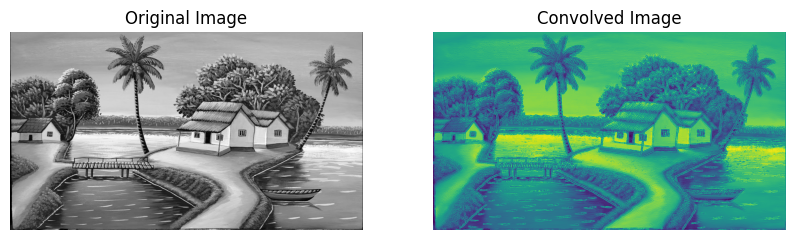

[[255   0 119 ... 160   0 255]
 [255   0 130 ... 160   0 255]
 [255   0 119 ... 160   0 255]
 ...
 [181   0  11 ... 186   0 255]
 [179   0   9 ...  21   0 255]
 [182   0  12 ... 105   0 255]]


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Define a simple kernel (e.g., edge detection filter)
kernel = np.array([[1, 1, 1],
                   [1, -7, 1],
                   [1, 1, 1]])

# Apply the convolution using OpenCV's filter2D function
convolved_image = cv2.filter2D(image, -1, kernel)

# Display the original and convolved image using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image)
plt.title('Convolved Image')
plt.axis('off')

plt.show()
print(convolved_image)

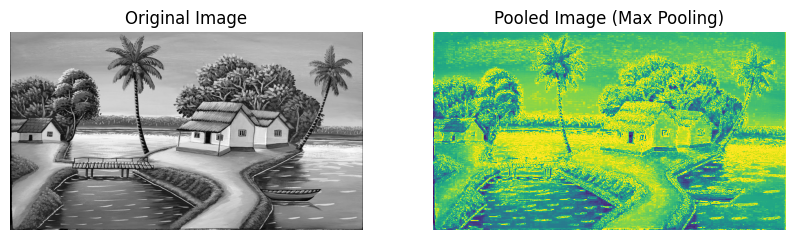

[[255. 202. 182. ... 169. 183. 255.]
 [255. 163. 163. ... 169. 183. 255.]
 [255. 189. 211. ... 169. 183. 255.]
 ...
 [174.  37.  54. ... 137. 254. 255.]
 [181.  39.  56. ... 225. 186. 255.]
 [182.  40.  55. ... 145. 105. 255.]]


In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a sample image (feature map) for pooling (4x4 for simplicity)


# Define pool size (2x2) and stride (2)
pool_size = (2, 2)
stride = 2

# Function for max pooling
def max_pooling(input_image, pool_size, stride):
    # Calculate the output dimensions after pooling
    output_height = (input_image.shape[0] - pool_size[0]) // stride + 1
    output_width = (input_image.shape[1] - pool_size[1]) // stride + 1
    
    # Initialize an empty output matrix
    output = np.zeros((output_height, output_width))
    
    # Apply the max pooling operation
    for i in range(output_height):
        for j in range(output_width):
            # Get the current window (pool size)
            window = input_image[i*stride:i*stride+pool_size[0], j*stride:j*stride+pool_size[1]]
            # Take the maximum value in the window and assign it to the output
            output[i, j] = np.max(window)
    
    return output

# Apply max pooling
pooled_image = max_pooling(convolved_image, pool_size, stride)

# Display the original and pooled images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pooled_image)
plt.title('Pooled Image (Max Pooling)')
plt.axis('off')

plt.show()
print(pooled_image)

Original Image (Feature Map):
[[  6 147 153 ... 175 177   2]
 [  0 147 153 ... 175 177   2]
 [  0 151 155 ... 175 177   2]
 ...
 [  1  31  38 ...  29  43   0]
 [  2  32  39 ...  54  62   5]
 [  2  32  39 ...  49  64   0]]

Pooled Image (Max Pooling):
[[255. 165. 162. ... 177. 169. 255.]
 [255. 169. 164. ... 173. 171. 255.]
 [255. 169. 171. ... 169. 169. 255.]
 ...
 [255. 222. 255. ... 255. 255. 255.]
 [255. 182. 255. ... 154. 171. 255.]
 [255. 255. 255. ... 192. 199. 255.]]

Gradients with respect to input image:
[[1. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


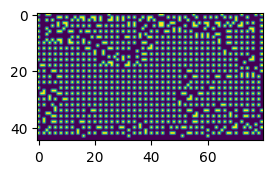

In [18]:
import numpy as np

# Create a sample image (feature map) for pooling (4x4 for simplicity)


# Define pool size (2x2) and stride (2)
pool_size = (2, 2)
stride = 2

# Forward pass - Max Pooling
def max_pooling_forward(input_image, pool_size, stride):
    output_height = (input_image.shape[0] - pool_size[0]) // stride + 1
    output_width = (input_image.shape[1] - pool_size[1]) // stride + 1
    output = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            window = input_image[i*stride:i*stride+pool_size[0], j*stride:j*stride+pool_size[1]]
            output[i, j] = np.max(window)
    
    return output

# Backpropagation - Gradients for Max Pooling
def max_pooling_backward(input_image, pool_size, stride, output_grad):
    output_height = (input_image.shape[0] - pool_size[0]) // stride + 1
    output_width = (input_image.shape[1] - pool_size[1]) // stride + 1
    input_grad = np.zeros_like(input_image)
    
    for i in range(output_height):
        for j in range(output_width):
            # Get the pooling window
            window = input_image[i*stride:i*stride+pool_size[0], j*stride:j*stride+pool_size[1]]
            
            # Find the position of the maximum value in the window
            max_pos = np.unravel_index(np.argmax(window), window.shape)
            
            # Propagate the gradient to the position of the max value in the input image
            input_grad[i*stride + max_pos[0], j*stride + max_pos[1]] += output_grad[i, j]
    
    return input_grad

# Perform forward pass with max pooling
pooled_image = max_pooling_forward(pooled_image, pool_size, stride)

# Assume we have a simple gradient from the next layer (e.g., 1 for all elements)
output_grad = np.ones_like(pooled_image)

# Perform backward pass (backpropagation through max pooling)
input_grad = max_pooling_backward(pooled_image, pool_size, stride, output_grad)

print("Original Image (Feature Map):")
print(image)
print("\nPooled Image (Max Pooling):")
print(pooled_image)
print("\nGradients with respect to input image:")
print(input_grad)

plt.subplot(1, 2, 1)
plt.imshow(input_grad)

ReLU Activated Feature Map:
[[255. 180. 160. ... 169. 166. 255.]
 [255. 162. 162. ... 167. 170. 255.]
 [255. 160. 154. ... 169. 163. 255.]
 ...
 [ 84. 243. 170. ... 150. 153. 255.]
 [162. 255. 174. ... 154. 166. 255.]
 [182. 186. 255. ... 170. 151. 255.]]


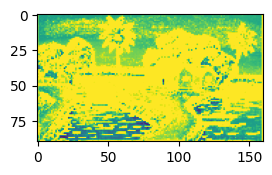

In [17]:
import numpy as np

# Example of a feature map after pooling (this could be after the convolution or pooling layer)


# Applying ReLU activation function after pooling
relu_output = np.maximum(0, pooled_image)

print("ReLU Activated Feature Map:")
print(relu_output)
plt.subplot(1, 2, 1)
plt.imshow(relu_output)

Batch Normalized Output:
[[ 0.73656059 -1.0953126  -1.58381212 ... -1.36398734 -1.43726227
   0.73656059]
 [ 0.73656059 -1.53496217 -1.53496217 ... -1.41283729 -1.33956236
   0.73656059]
 [ 0.73656059 -1.58381212 -1.73036198 ... -1.36398734 -1.51053719
   0.73656059]
 ...
 [-3.44011029  0.44346088 -1.33956236 ... -1.82806188 -1.75478695
   0.73656059]
 [-1.53496217  0.73656059 -1.24186246 ... -1.73036198 -1.43726227
   0.73656059]
 [-1.04646265 -0.94876275  0.73656059 ... -1.33956236 -1.8036369
   0.73656059]]


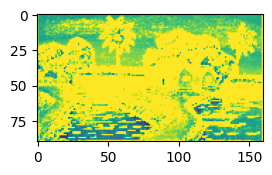

In [16]:
import numpy as np



# Batch Normalization Parameters
epsilon = 1e-5  # Small constant to avoid division by zero
gamma = 1.0  # Scaling factor (learnable parameter)
beta = 0.0   # Shifting factor (learnable parameter)

# 1. Compute the mean and variance of the feature map
mean = np.mean(relu_output)
variance = np.var(relu_output)

# 2. Normalize the feature map
normalized_feature_map = (relu_output - mean) / np.sqrt(variance + epsilon)

# 3. Apply the scaling and shifting
bn_output = gamma * normalized_feature_map + beta

print("Batch Normalized Output:")
print(bn_output)
plt.subplot(1, 2, 1)
plt.imshow(bn_output)